In [1]:
#define lstm model
import torch
from torch.nn import *
import torch.nn.functional as F
from pandas_datareader import data as web
import os
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
from utils import *

In [3]:
T=30

In [4]:
etfs = ['XLB','XLE','XLF','XLI','XLP','XLV','XLY','XLU']
metrics = ["ATR","SD_Log_Close"]
start = '2001-01-01'
end = '2022-01-01'
start_t = '2023-01-01'
end_t = '2024-01-05'
models = {}
lrs = [0]

[*********************100%***********************]  1 of 1 completed


read  5284  lines of data for ticker:  XLB


[*********************100%***********************]  1 of 1 completed


read  253  lines of data for ticker:  XLB
Number of neg. ATR: 0
On the 30th day, Bought 122 shares for $9935.68
On the 31th day, Bought 0 shares for $0.0
On the 32th day, Bought 0 shares for $0.0
On the 33th day, Bought 0 shares for $0.0
On the 34th day, Bought 0 shares for $0.0
On the 35th day, Bought 0 shares for $0.0
On the 36th day, Bought 0 shares for $0.0
On the 37th day, Bought 0 shares for $0.0
On the 38th day, Bought 0 shares for $0.0
On the 52th day, Bought 0 shares for $0.0
On the 53th day, Bought 0 shares for $0.0
On the 54th day, Bought 0 shares for $0.0
On the 55th day, Bought 0 shares for $0.0
On the 56th day, Bought 0 shares for $0.0
On the 57th day, Bought 0 shares for $0.0
On the 58th day, Bought 0 shares for $0.0
On the 59th day, Bought 0 shares for $0.0
On the 132th day, Bought 0 shares for $0.0


[*********************100%***********************]  1 of 1 completed

On the 220th day, Bought 0 shares for $0.0
On the 221th day, Bought 0 shares for $0.0
On the 222th day, Bought 0 shares for $0.0
On the 243th day, Bought 0 shares for $0.0
On the 244th day, Bought 0 shares for $0.0
XLB Final Value: 10336.72, Final Money: 64.31999999999971, Final Shares: 122.0
read  5284  lines of data for ticker:  XLB



[*********************100%***********************]  1 of 1 completed


read  253  lines of data for ticker:  XLB
Number of neg. ATR: 0
On the 31th day, Bought 121 shares for $9923.210000000001
On the 32th day, Bought 0 shares for $0.0
On the 33th day, Bought 0 shares for $0.0
On the 34th day, Bought 0 shares for $0.0
On the 35th day, Bought 0 shares for $0.0
On the 219th day, Bought 0 shares for $0.0
On the 220th day, Bought 0 shares for $0.0
On the 221th day, Bought 0 shares for $0.0
On the 222th day, Bought 0 shares for $0.0
XLB Final Value: 10264.99, Final Money: 76.78999999999905, Final Shares: 121.0


[*********************100%***********************]  1 of 1 completed


read  5284  lines of data for ticker:  XLE


[*********************100%***********************]  1 of 1 completed


read  253  lines of data for ticker:  XLE
Number of neg. ATR: 0
On the 117th day, Bought 122 shares for $9967.4
On the 118th day, Bought 0 shares for $0.0
On the 119th day, Bought 0 shares for $0.0
On the 159th day, Bought 0 shares for $0.0
On the 160th day, Bought 0 shares for $0.0
On the 161th day, Bought 0 shares for $0.0
On the 164th day, Bought 0 shares for $0.0


[*********************100%***********************]  1 of 1 completed

On the 241th day, Bought 0 shares for $0.0
On the 243th day, Bought 0 shares for $0.0
On the 244th day, Bought 0 shares for $0.0
XLE Final Value: 10355.02, Final Money: 32.600000000000364, Final Shares: 122.0
read  5284  lines of data for ticker:  XLE



[*********************100%***********************]  1 of 1 completed


read  253  lines of data for ticker:  XLE
Number of neg. ATR: 0
On the 133th day, Bought 115 shares for $9960.15
On the 134th day, Bought 0 shares for $0.0
On the 222th day, Bought 0 shares for $0.0
XLE Final Value: 9770.0, Final Money: 39.850000000000364, Final Shares: 115.0


[*********************100%***********************]  1 of 1 completed


read  5284  lines of data for ticker:  XLF


[*********************100%***********************]  1 of 1 completed


read  253  lines of data for ticker:  XLF
Number of neg. ATR: 0
On the 34th day, Bought 277 shares for $9974.769999999999
On the 35th day, Bought 0 shares for $0.0
On the 36th day, Bought 0 shares for $0.0
On the 39th day, sold 277.0 shares for $8761.51


[*********************100%***********************]  1 of 1 completed

On the 219th day, Bought 249 shares for $8769.779999999999
On the 220th day, Bought 0 shares for $0.0
On the 221th day, Bought 0 shares for $0.0
On the 222th day, Bought 0 shares for $0.0
On the 223th day, Bought 0 shares for $0.0
XLF Final Value: 9376.870000000004, Final Money: 16.960000000002765, Final Shares: 249.0
read  5284  lines of data for ticker:  XLF



[*********************100%***********************]  1 of 1 completed


read  253  lines of data for ticker:  XLF
Number of neg. ATR: 0
On the 219th day, Bought 283 shares for $9967.26
On the 221th day, Bought 0 shares for $0.0
XLF Final Value: 10670.710000000001, Final Money: 32.73999999999978, Final Shares: 283.0


[*********************100%***********************]  1 of 1 completed


read  5284  lines of data for ticker:  XLI


[*********************100%***********************]  1 of 1 completed


read  253  lines of data for ticker:  XLI
Number of neg. ATR: 0
On the 30th day, Bought 98 shares for $9904.859999999999
On the 31th day, Bought 0 shares for $0.0
On the 32th day, Bought 0 shares for $0.0
On the 33th day, Bought 0 shares for $0.0
On the 34th day, Bought 0 shares for $0.0
On the 35th day, Bought 0 shares for $0.0
On the 36th day, Bought 0 shares for $0.0
On the 37th day, Bought 0 shares for $0.0
On the 38th day, Bought 0 shares for $0.0
On the 39th day, Bought 0 shares for $0.0
On the 56th day, Bought 0 shares for $0.0
On the 65th day, Bought 0 shares for $0.0
On the 66th day, Bought 0 shares for $0.0
On the 67th day, Bought 0 shares for $0.0
On the 68th day, Bought 0 shares for $0.0
On the 69th day, Bought 0 shares for $0.0
On the 70th day, Bought 0 shares for $0.0
On the 117th day, Bought 0 shares for $0.0
On the 118th day, Bought 0 shares for $0.0
On the 119th day, Bought 0 shares for $0.0
On the 120th day, Bought 0 shares for $0.0
On the 128th day, Bought 0 shares f

[*********************100%***********************]  1 of 1 completed

On the 219th day, Bought 0 shares for $0.0
On the 220th day, Bought 0 shares for $0.0
On the 221th day, Bought 0 shares for $0.0
On the 222th day, Bought 0 shares for $0.0
XLI Final Value: 11002.54, Final Money: 95.14000000000124, Final Shares: 98.0
read  5284  lines of data for ticker:  XLI



[*********************100%***********************]  1 of 1 completed


read  253  lines of data for ticker:  XLI
Number of neg. ATR: 0
On the 55th day, Bought 98 shares for $9939.16
On the 56th day, Bought 0 shares for $0.0
On the 64th day, Bought 0 shares for $0.0
On the 65th day, Bought 0 shares for $0.0
On the 66th day, Bought 0 shares for $0.0
On the 67th day, Bought 0 shares for $0.0
On the 68th day, Bought 0 shares for $0.0
On the 133th day, Bought 0 shares for $0.0
On the 219th day, Bought 0 shares for $0.0
XLI Final Value: 10968.24, Final Money: 60.840000000000146, Final Shares: 98.0


[*********************100%***********************]  1 of 1 completed


read  5284  lines of data for ticker:  XLP


[*********************100%***********************]  1 of 1 completed


read  253  lines of data for ticker:  XLP
Number of neg. ATR: 0
On the 33th day, Bought 137 shares for $9929.76
On the 35th day, Bought 0 shares for $0.0
On the 36th day, Bought 0 shares for $0.0
On the 37th day, Bought 0 shares for $0.0
On the 38th day, Bought 0 shares for $0.0
On the 48th day, Bought 0 shares for $0.0
On the 52th day, Bought 0 shares for $0.0
On the 53th day, Bought 0 shares for $0.0
On the 54th day, Bought 0 shares for $0.0
On the 55th day, Bought 0 shares for $0.0
On the 56th day, Bought 0 shares for $0.0
On the 57th day, Bought 0 shares for $0.0
On the 58th day, Bought 0 shares for $0.0
On the 59th day, Bought 0 shares for $0.0
On the 60th day, Bought 0 shares for $0.0
On the 61th day, Bought 0 shares for $0.0
On the 62th day, Bought 0 shares for $0.0
On the 63th day, Bought 0 shares for $0.0
On the 185th day, sold 137.0 shares for $9235.17
On the 221th day, Bought 132 shares for $9243.960000000001
XLP Final Value: 9587.89, Final Money: 61.44999999999891, Final Sh

[*********************100%***********************]  1 of 1 completed


read  5284  lines of data for ticker:  XLP


[*********************100%***********************]  1 of 1 completed


read  253  lines of data for ticker:  XLP
Number of neg. ATR: 0
On the 33th day, Bought 137 shares for $9929.76
On the 47th day, Bought 0 shares for $0.0
On the 55th day, Bought 0 shares for $0.0
On the 56th day, Bought 0 shares for $0.0
On the 57th day, Bought 0 shares for $0.0
On the 58th day, Bought 0 shares for $0.0
On the 59th day, Bought 0 shares for $0.0
On the 60th day, Bought 0 shares for $0.0
On the 61th day, Bought 0 shares for $0.0
On the 62th day, Bought 0 shares for $0.0
On the 63th day, Bought 0 shares for $0.0
On the 184th day, sold 137.0 shares for $9142.01
XLP Final Value: 9212.25, Final Money: 9212.25, Final Shares: 0.0


[*********************100%***********************]  1 of 1 completed


read  5284  lines of data for ticker:  XLV


[*********************100%***********************]  1 of 1 completed


read  253  lines of data for ticker:  XLV
Number of neg. ATR: 0
On the 30th day, Bought 78 shares for $9970.74
On the 31th day, Bought 0 shares for $0.0
On the 32th day, Bought 0 shares for $0.0
On the 33th day, Bought 0 shares for $0.0
On the 34th day, Bought 0 shares for $0.0
On the 35th day, Bought 0 shares for $0.0
On the 36th day, Bought 0 shares for $0.0
On the 37th day, Bought 0 shares for $0.0
On the 38th day, Bought 0 shares for $0.0
On the 57th day, Bought 0 shares for $0.0
On the 153th day, Bought 0 shares for $0.0
On the 154th day, Bought 0 shares for $0.0


[*********************100%***********************]  1 of 1 completed

XLV Final Value: 10889.980000000001, Final Money: 29.26000000000022, Final Shares: 78.0
read  5284  lines of data for ticker:  XLV



[*********************100%***********************]  1 of 1 completed


read  253  lines of data for ticker:  XLV
Number of neg. ATR: 0
On the 86th day, Bought 76 shares for $9936.240000000002
On the 88th day, Bought 0 shares for $0.0
On the 114th day, Bought 0 shares for $0.0
On the 115th day, Bought 0 shares for $0.0
On the 138th day, Bought 0 shares for $0.0
On the 140th day, Bought 0 shares for $0.0
On the 209th day, sold 76.0 shares for $9652.0
On the 216th day, Bought 74 shares for $9637.76
On the 218th day, Bought 0 shares for $0.0
On the 219th day, Bought 0 shares for $0.0
On the 230th day, Bought 0 shares for $0.0
On the 231th day, Bought 0 shares for $0.0
On the 237th day, sold 74.0 shares for $9991.480000000001
XLV Final Value: 10069.48, Final Money: 10069.48, Final Shares: 0.0


[*********************100%***********************]  1 of 1 completed


read  5284  lines of data for ticker:  XLY


[*********************100%***********************]  1 of 1 completed


read  253  lines of data for ticker:  XLY
Number of neg. ATR: 0
On the 30th day, Bought 68 shares for $9897.400000000001
On the 31th day, Bought 0 shares for $0.0
On the 32th day, Bought 0 shares for $0.0
On the 33th day, Bought 0 shares for $0.0
On the 34th day, Bought 0 shares for $0.0
On the 35th day, Bought 0 shares for $0.0
On the 36th day, Bought 0 shares for $0.0
On the 37th day, Bought 0 shares for $0.0
On the 38th day, Bought 0 shares for $0.0
On the 39th day, Bought 0 shares for $0.0
On the 40th day, Bought 0 shares for $0.0
On the 41th day, Bought 0 shares for $0.0
On the 42th day, Bought 0 shares for $0.0
On the 43th day, Bought 0 shares for $0.0
On the 44th day, Bought 0 shares for $0.0
On the 45th day, Bought 0 shares for $0.0
On the 46th day, Bought 0 shares for $0.0
On the 47th day, Bought 0 shares for $0.0
On the 48th day, Bought 0 shares for $0.0
On the 49th day, Bought 0 shares for $0.0
On the 50th day, Bought 0 shares for $0.0
On the 51th day, Bought 0 shares for $0

[*********************100%***********************]  1 of 1 completed

On the 219th day, Bought 0 shares for $0.0
On the 220th day, Bought 0 shares for $0.0
On the 221th day, Bought 0 shares for $0.0
On the 222th day, Bought 0 shares for $0.0
On the 223th day, Bought 0 shares for $0.0
On the 224th day, Bought 0 shares for $0.0
On the 225th day, Bought 0 shares for $0.0
On the 229th day, Bought 0 shares for $0.0
On the 230th day, Bought 0 shares for $0.0
On the 231th day, Bought 0 shares for $0.0
On the 232th day, Bought 0 shares for $0.0
On the 233th day, Bought 0 shares for $0.0
On the 234th day, Bought 0 shares for $0.0
On the 235th day, Bought 0 shares for $0.0
On the 236th day, Bought 0 shares for $0.0
On the 240th day, Bought 0 shares for $0.0
On the 241th day, Bought 0 shares for $0.0
On the 242th day, Bought 0 shares for $0.0
On the 243th day, Bought 0 shares for $0.0
On the 244th day, Bought 0 shares for $0.0
XLY Final Value: 11822.399999999998, Final Money: 102.59999999999854, Final Shares: 68.0


read  5284  lines of data for ticker:  XLY


[*********************100%***********************]  1 of 1 completed


read  253  lines of data for ticker:  XLY
Number of neg. ATR: 0
On the 34th day, Bought 68 shares for $9974.24
On the 35th day, Bought 0 shares for $0.0
On the 36th day, Bought 0 shares for $0.0
On the 37th day, Bought 0 shares for $0.0
On the 38th day, Bought 0 shares for $0.0
On the 54th day, Bought 0 shares for $0.0
On the 55th day, Bought 0 shares for $0.0
On the 56th day, Bought 0 shares for $0.0
On the 57th day, Bought 0 shares for $0.0
On the 70th day, Bought 0 shares for $0.0
On the 83th day, Bought 0 shares for $0.0
On the 86th day, Bought 0 shares for $0.0
On the 109th day, Bought 0 shares for $0.0
On the 127th day, Bought 0 shares for $0.0
On the 128th day, Bought 0 shares for $0.0
On the 129th day, Bought 0 shares for $0.0
On the 165th day, Bought 0 shares for $0.0
On the 219th day, Bought 0 shares for $0.0
On the 220th day, Bought 0 shares for $0.0
On the 221th day, Bought 0 shares for $0.0
On the 222th day, Bought 0 shares for $0.0
On the 223th day, Bought 0 shares for $0

[*********************100%***********************]  1 of 1 completed


read  5284  lines of data for ticker:  XLU


[*********************100%***********************]  1 of 1 completed


read  253  lines of data for ticker:  XLU
Number of neg. ATR: 0
On the 56th day, Bought 147 shares for $9975.42
On the 57th day, Bought 0 shares for $0.0
On the 58th day, Bought 0 shares for $0.0
On the 59th day, Bought 0 shares for $0.0
On the 60th day, Bought 0 shares for $0.0
On the 61th day, Bought 0 shares for $0.0
On the 154th day, Bought 0 shares for $0.0
On the 181th day, sold 147.0 shares for $8346.66
On the 219th day, Bought 133 shares for $8352.4
On the 220th day, Bought 0 shares for $0.0
On the 221th day, Bought 0 shares for $0.0
On the 223th day, Bought 0 shares for $0.0
XLU Final Value: 8569.410000000002, Final Money: 18.840000000000146, Final Shares: 133.0


[*********************100%***********************]  1 of 1 completed


read  5284  lines of data for ticker:  XLU


[*********************100%***********************]  1 of 1 completed


read  253  lines of data for ticker:  XLU
Number of neg. ATR: 0
On the 57th day, Bought 143 shares for $9992.84
On the 65th day, Bought 0 shares for $0.0
On the 66th day, Bought 0 shares for $0.0
On the 67th day, Bought 0 shares for $0.0
On the 68th day, Bought 0 shares for $0.0
On the 71th day, Bought 0 shares for $0.0
On the 155th day, Bought 0 shares for $0.0
On the 159th day, Bought 0 shares for $0.0
On the 176th day, Bought 0 shares for $0.0
On the 181th day, sold 143.0 shares for $8119.54
On the 219th day, Bought 129 shares for $8101.2
On the 220th day, Bought 0 shares for $0.0
On the 221th day, Bought 0 shares for $0.0
On the 234th day, sold 129.0 shares for $8203.11
XLU Final Value: 8228.61, Final Money: 8228.61, Final Shares: 0.0


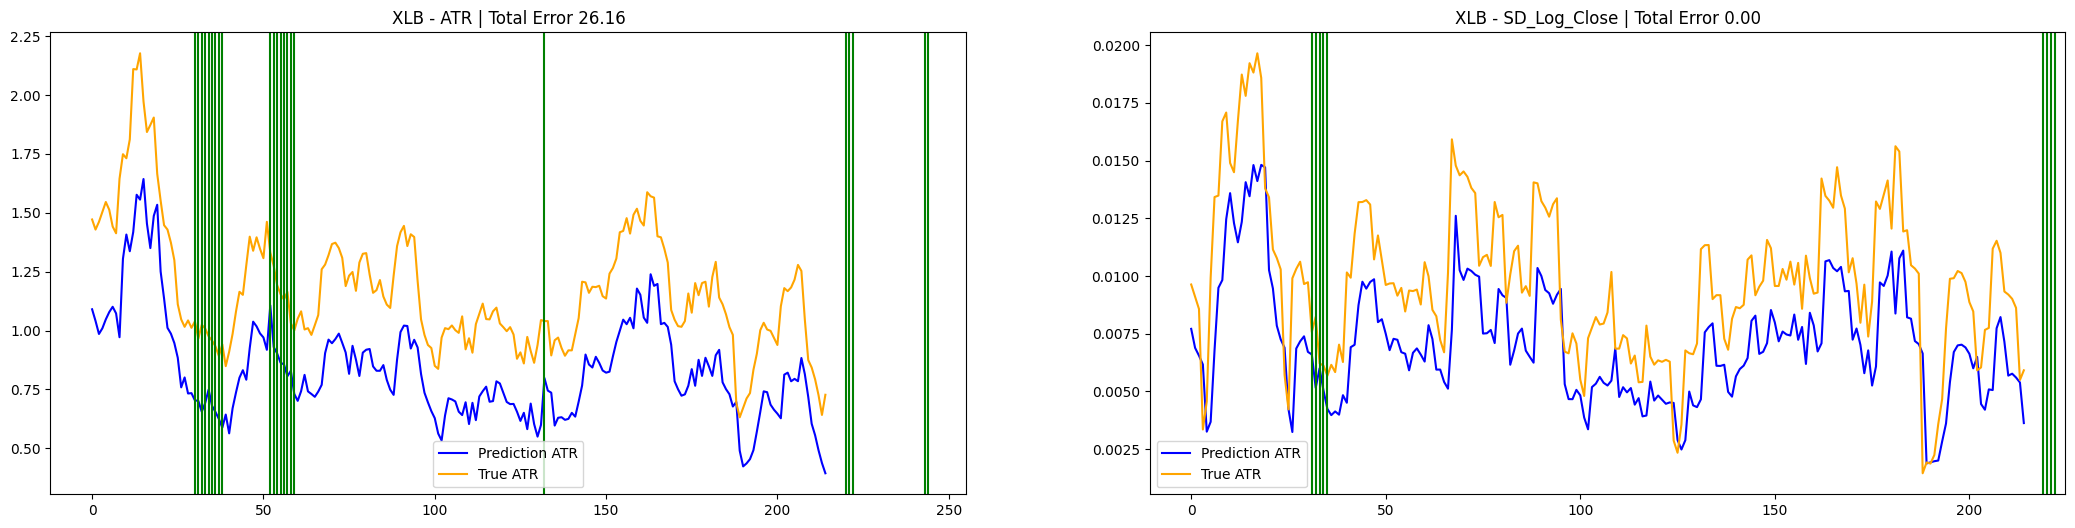

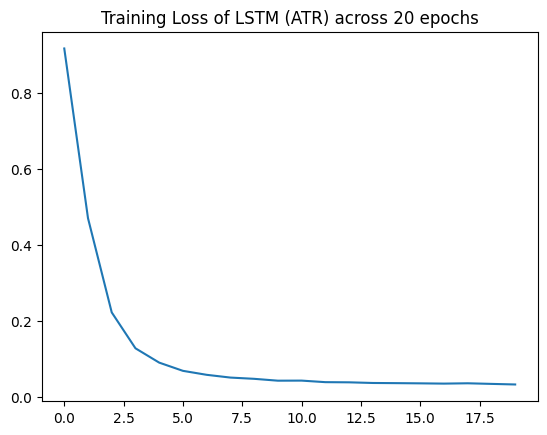

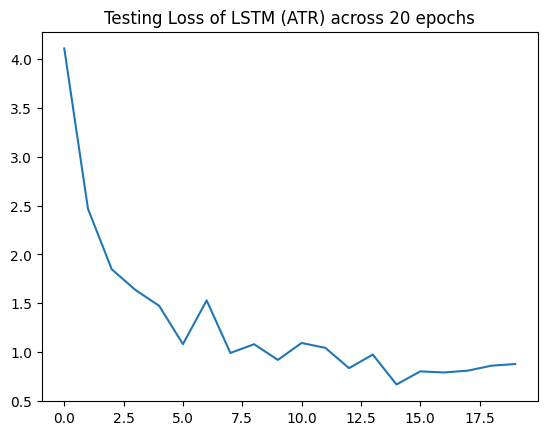

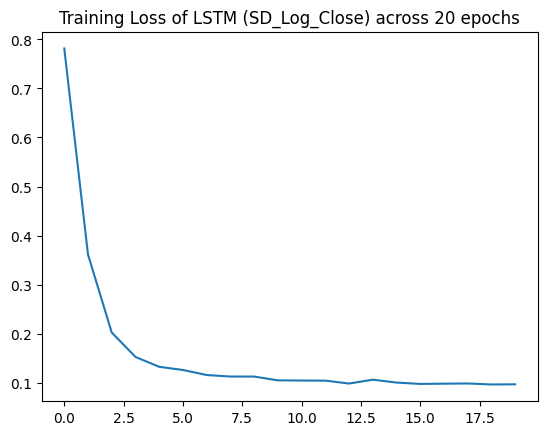

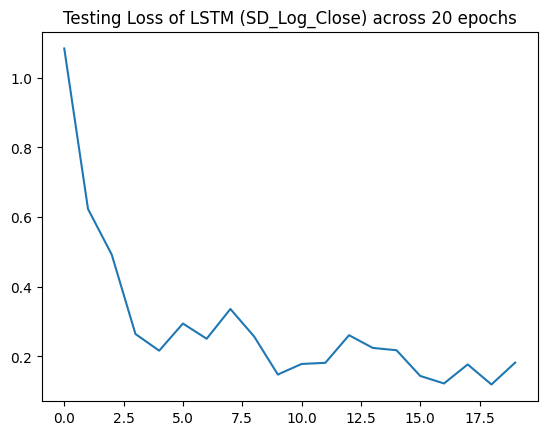

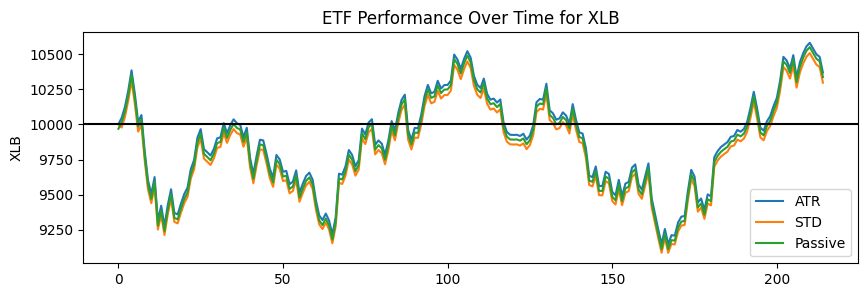

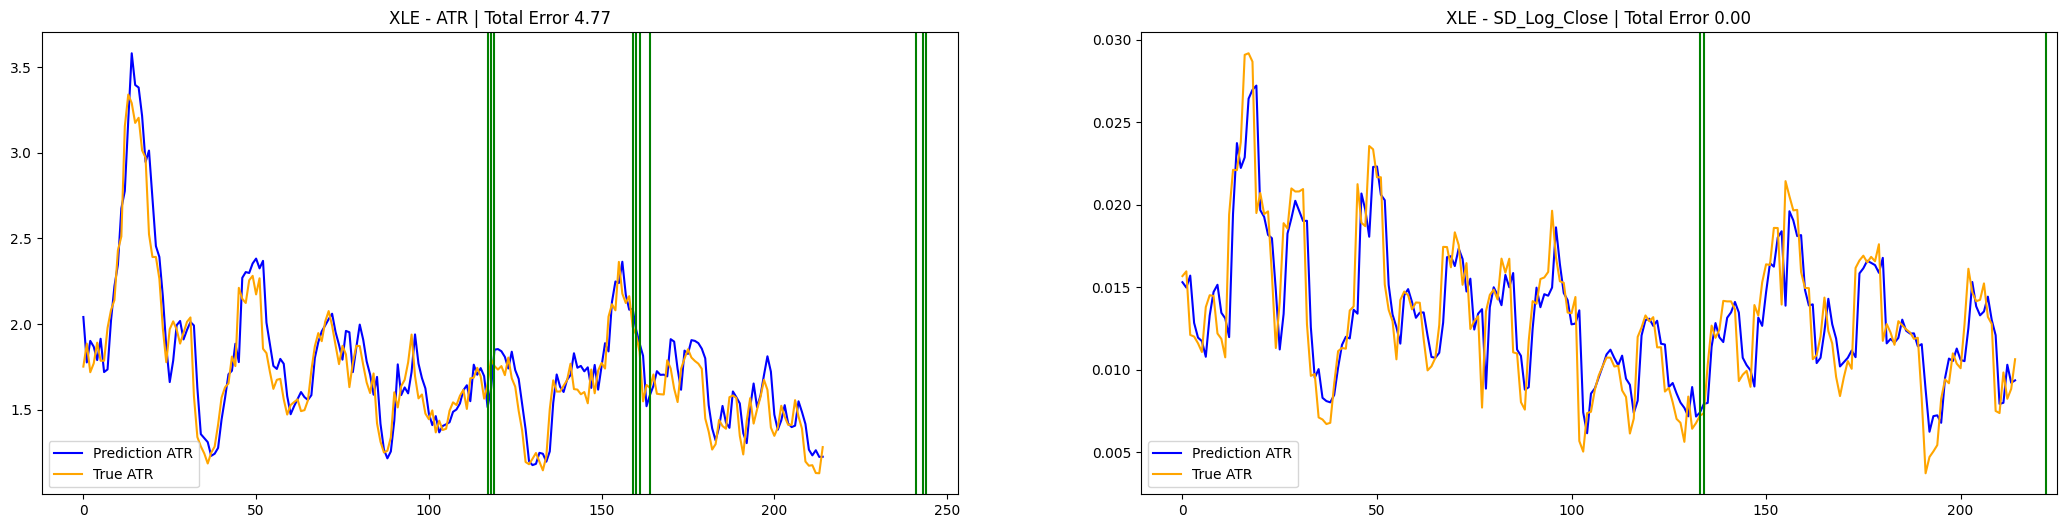

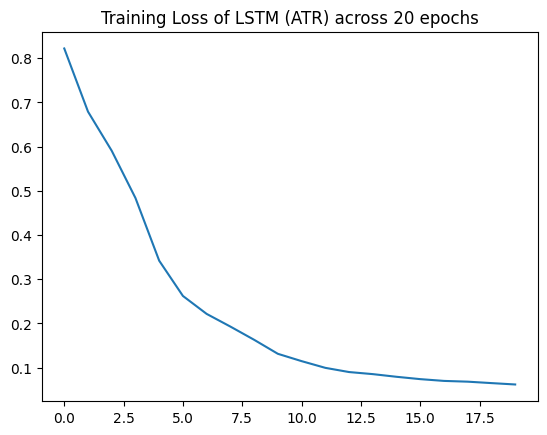

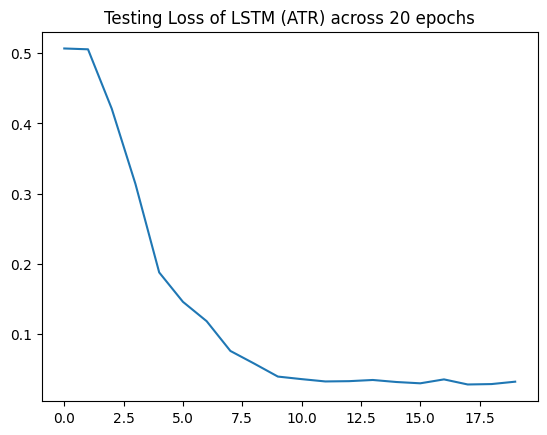

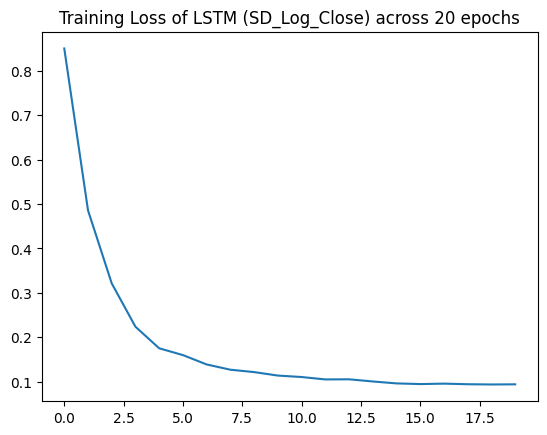

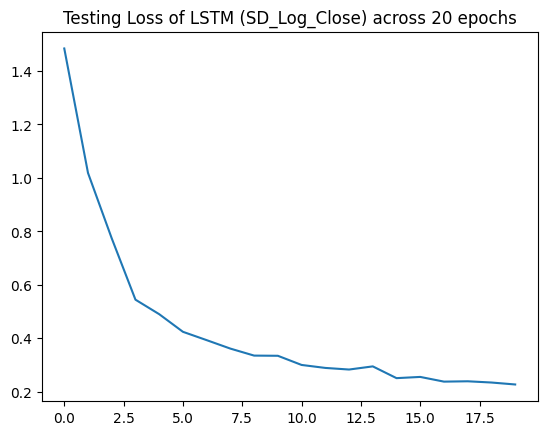

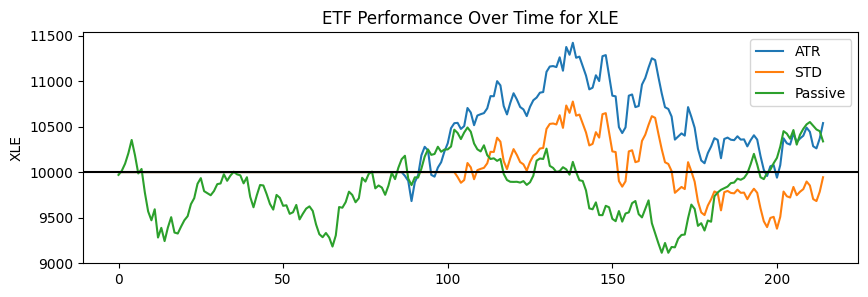

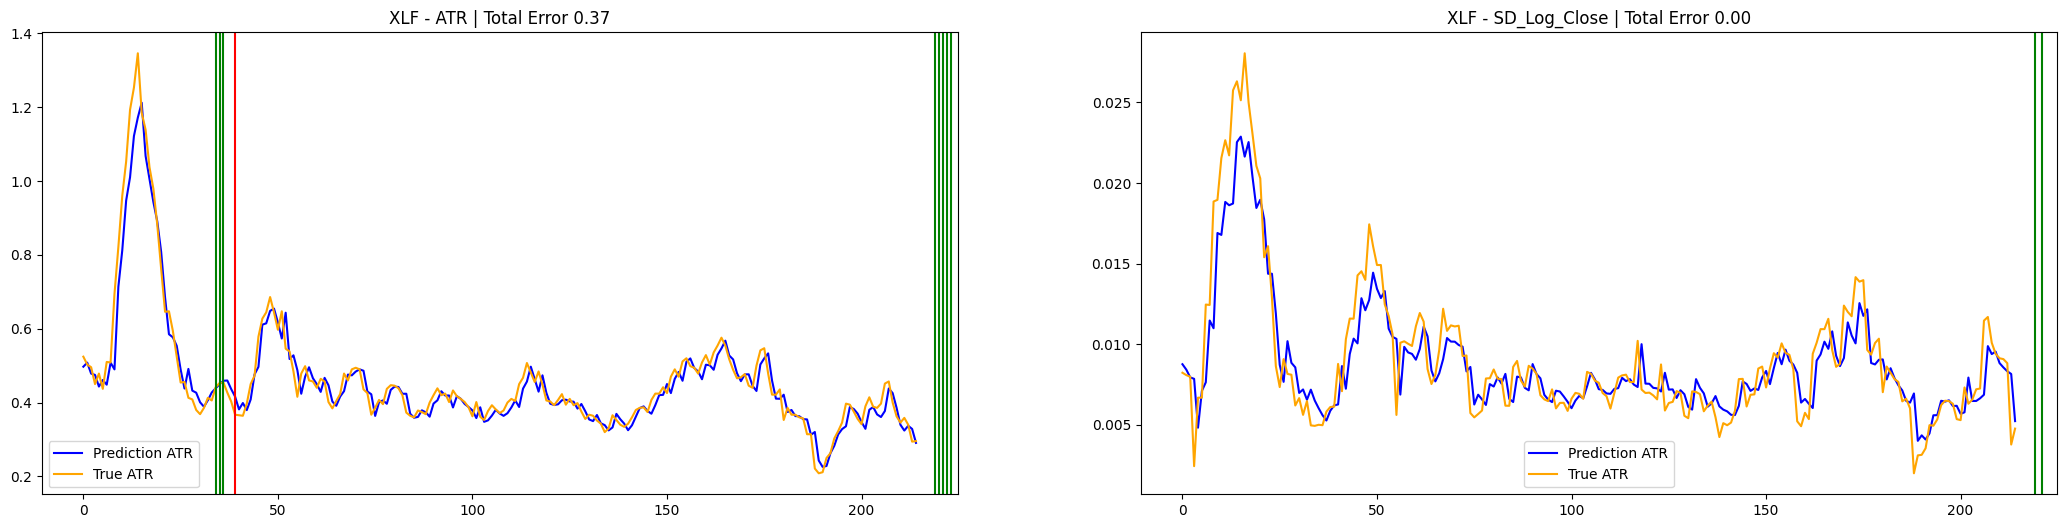

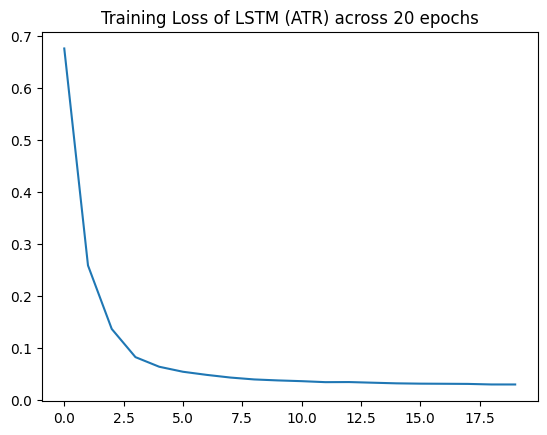

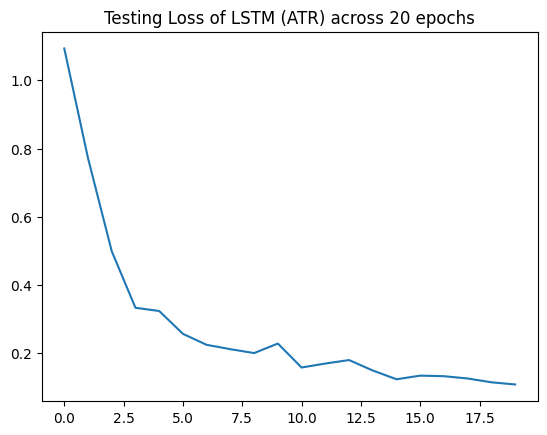

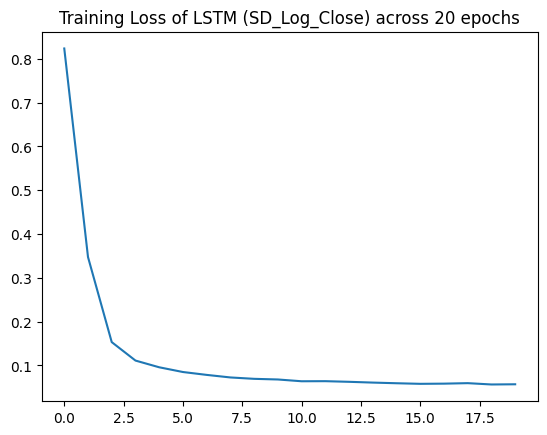

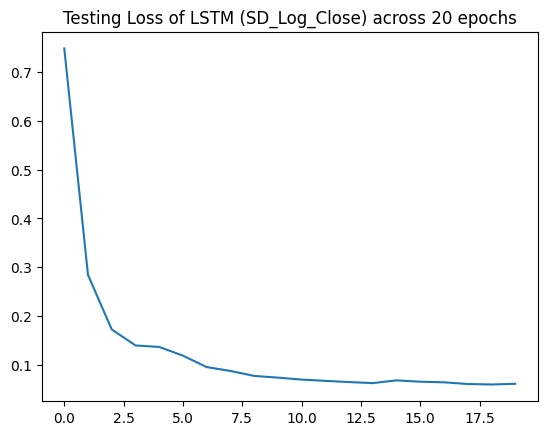

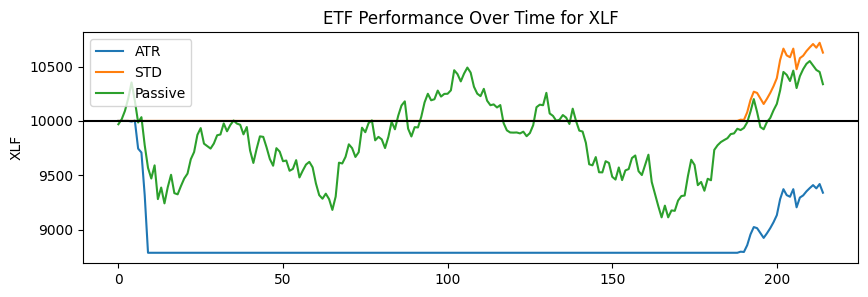

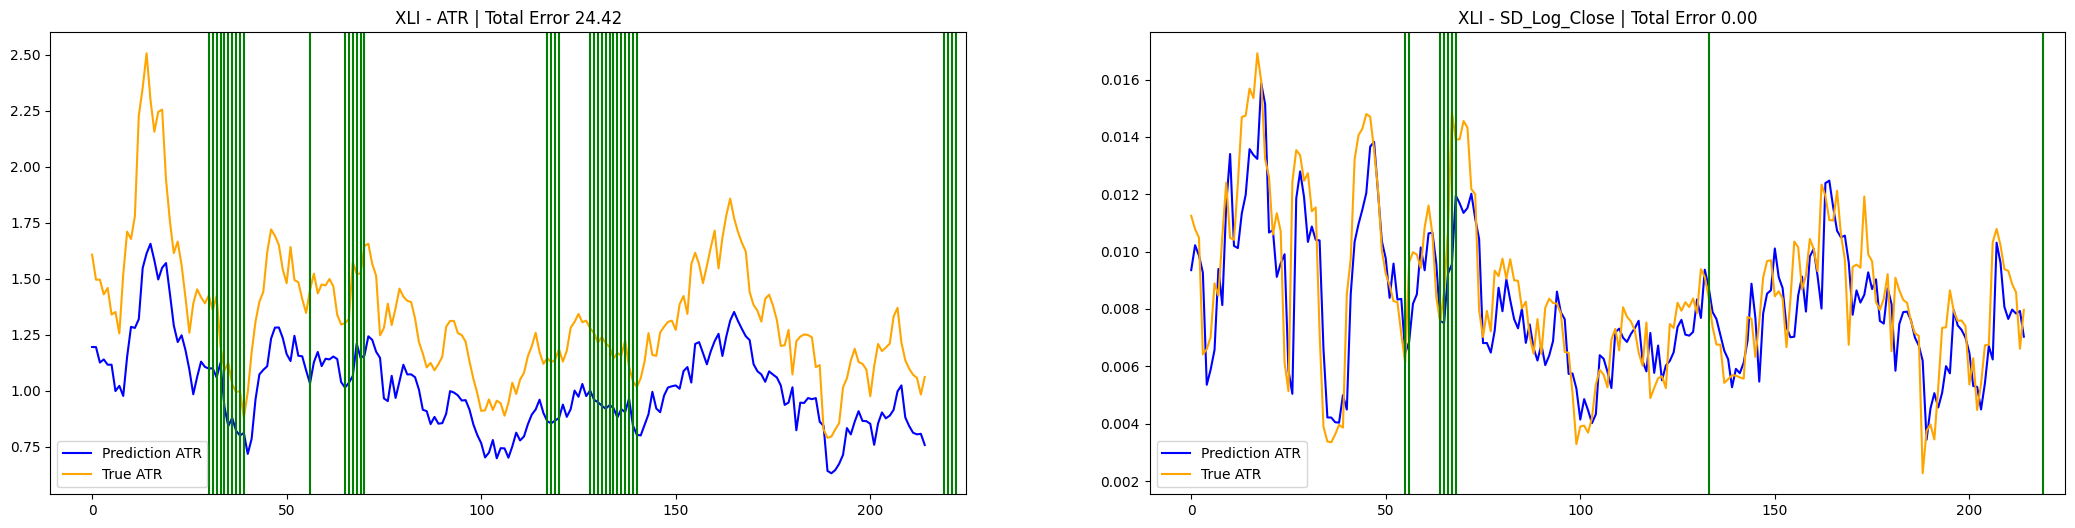

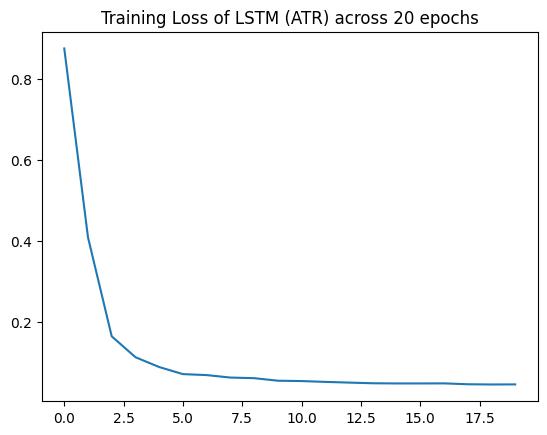

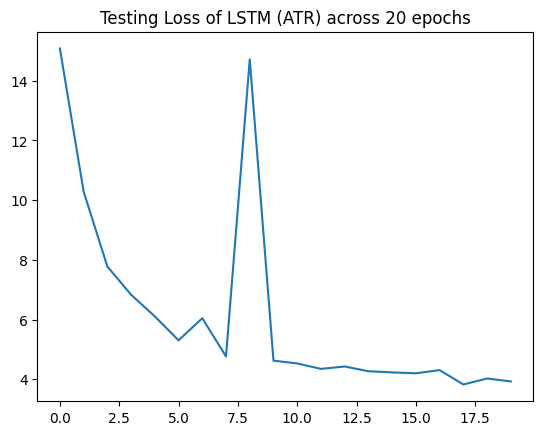

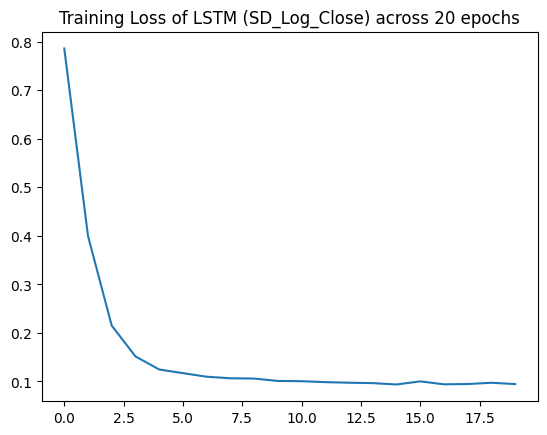

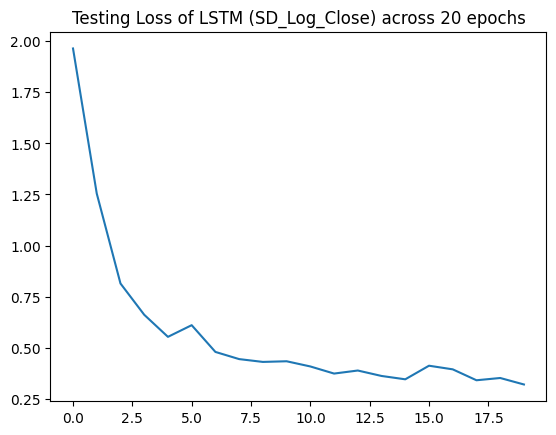

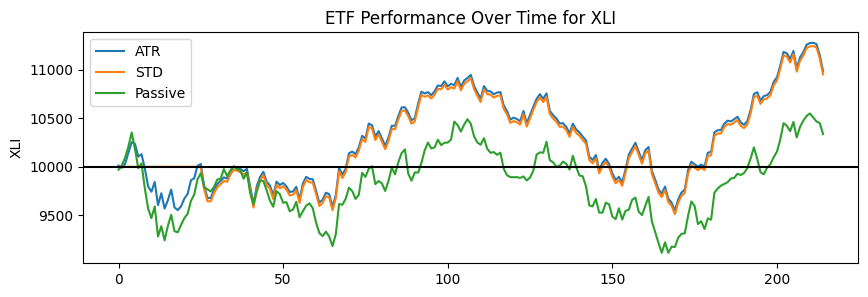

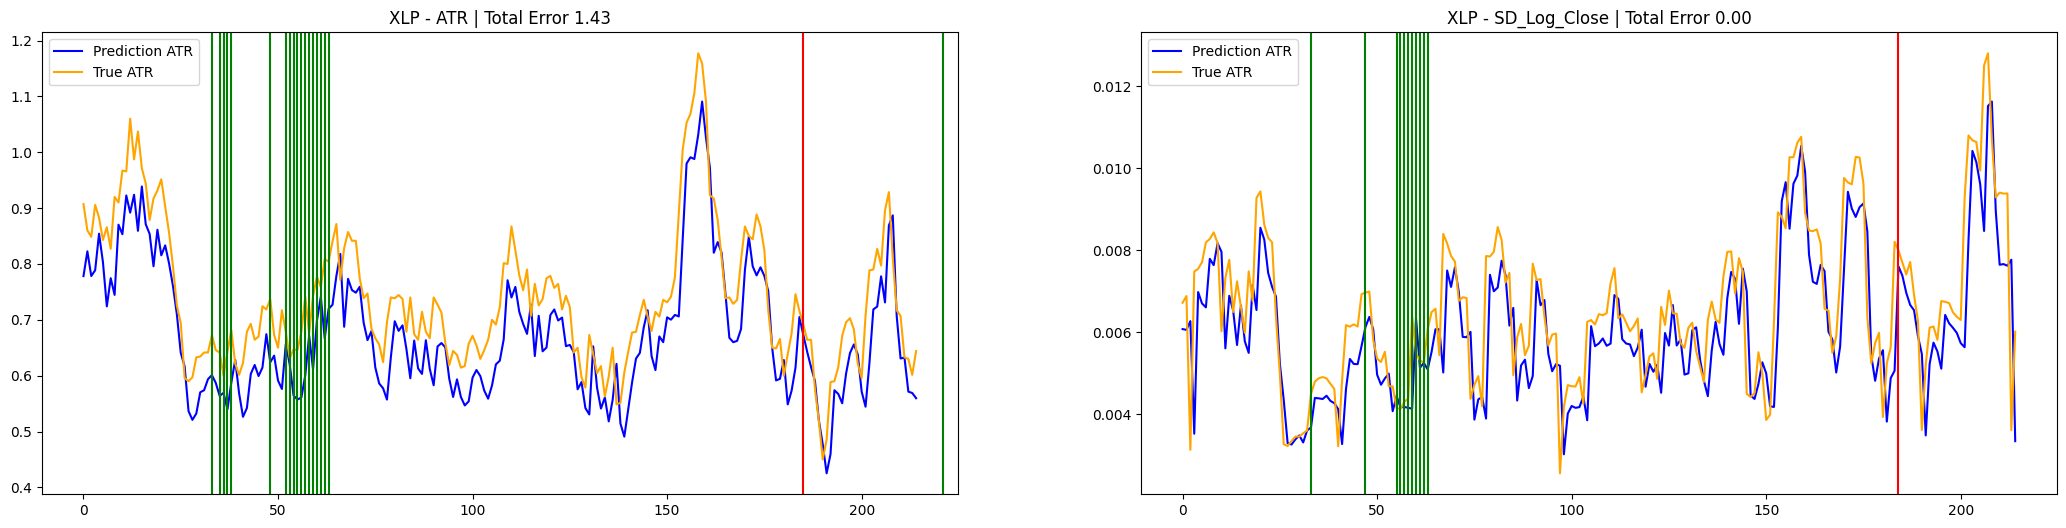

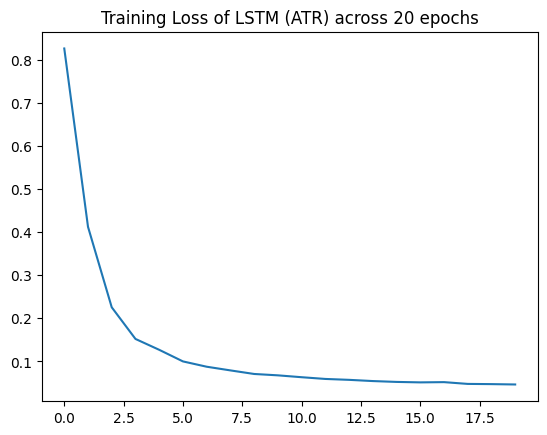

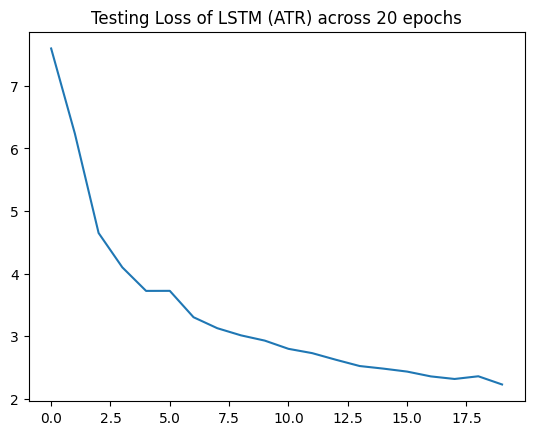

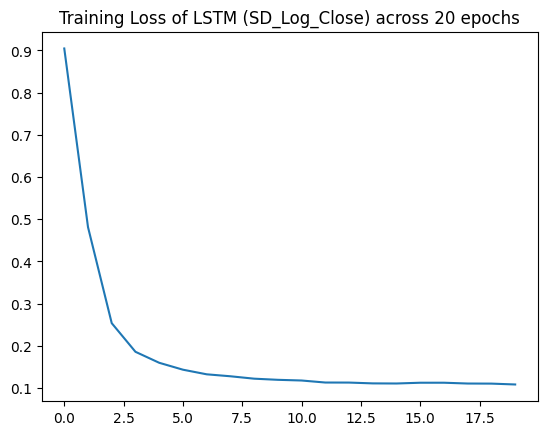

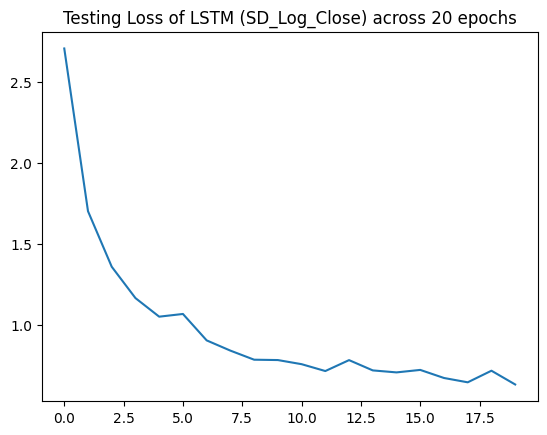

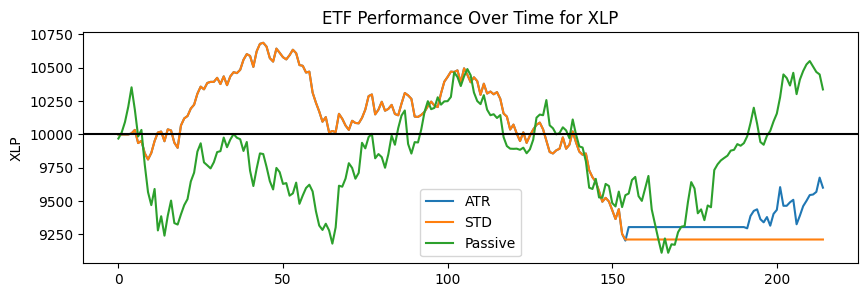

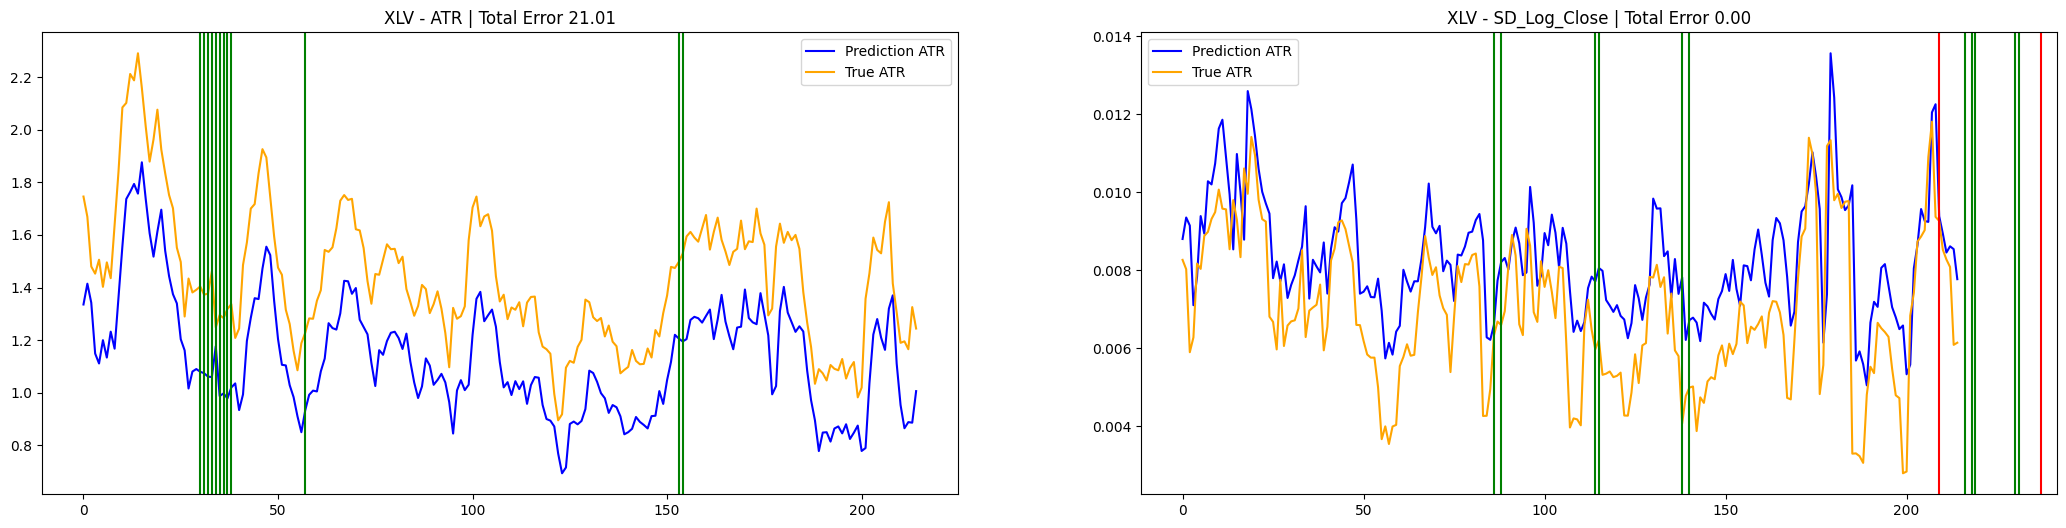

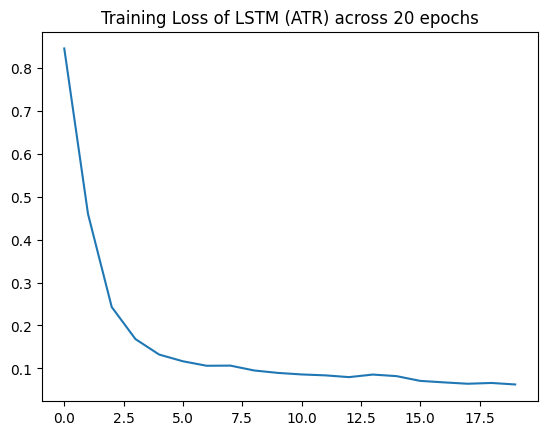

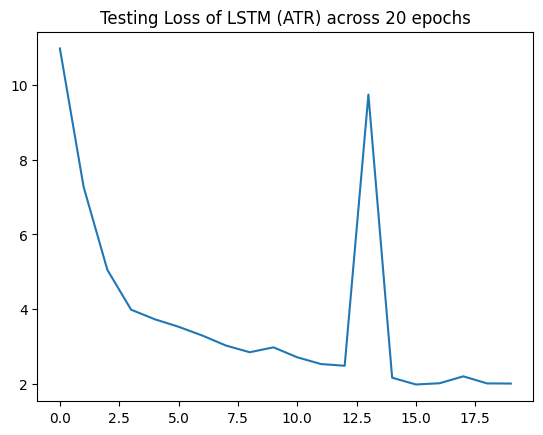

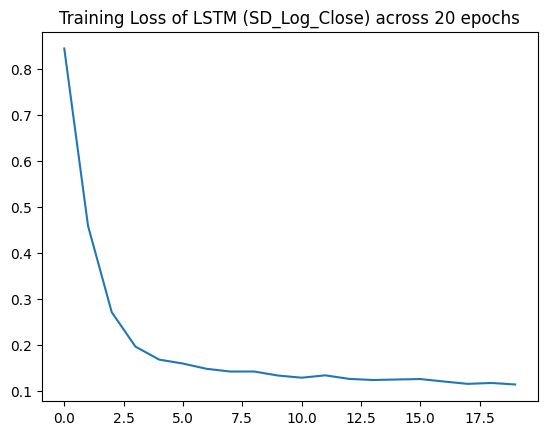

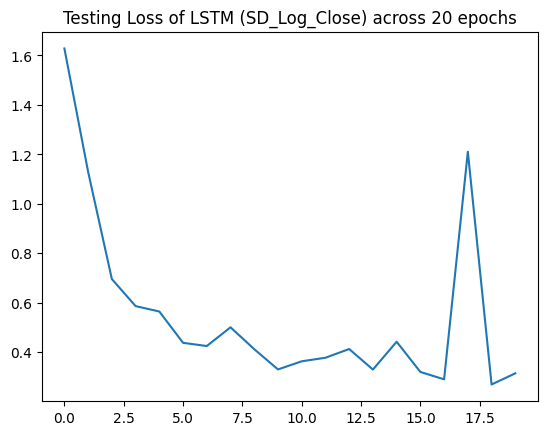

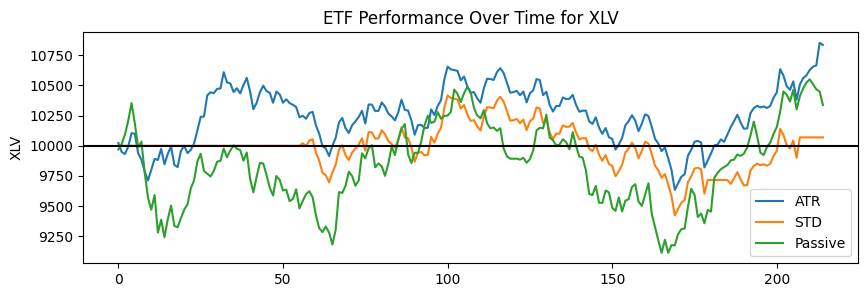

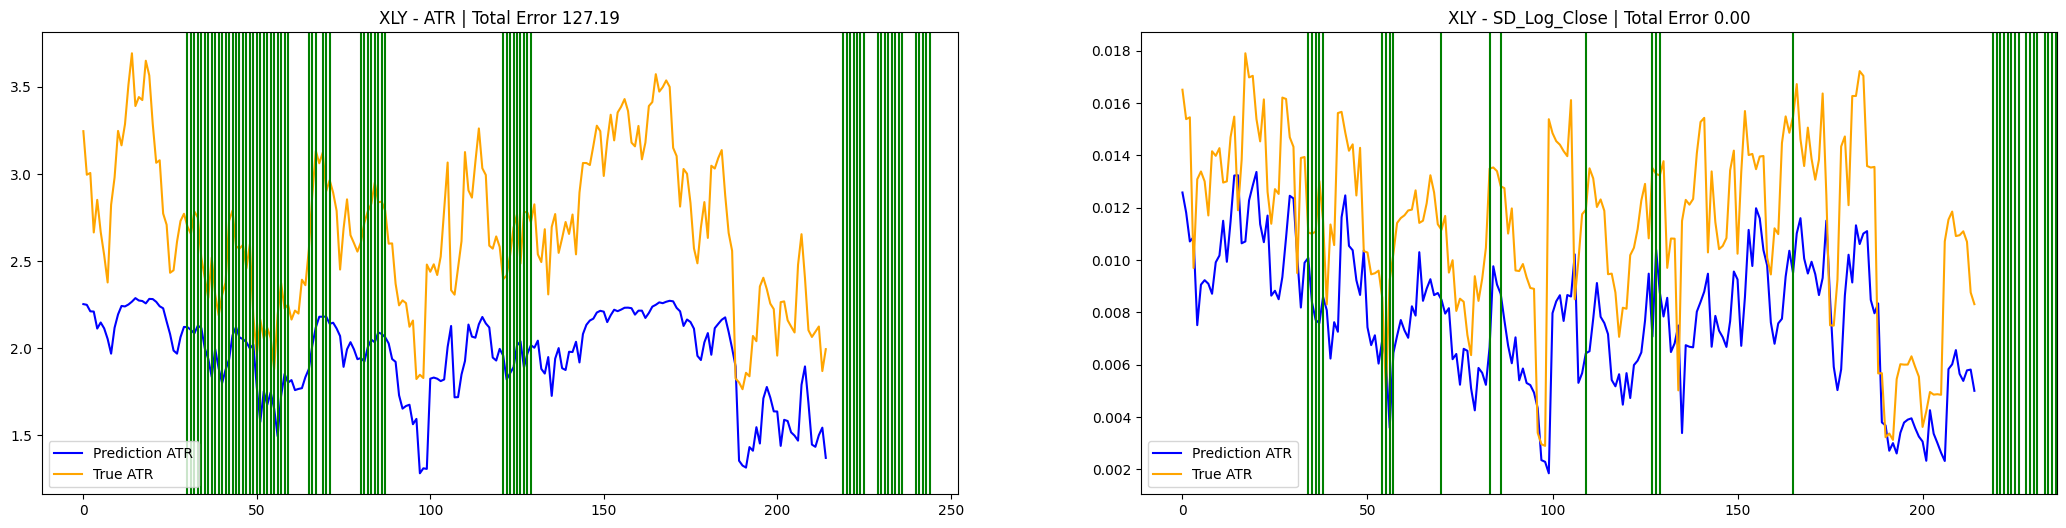

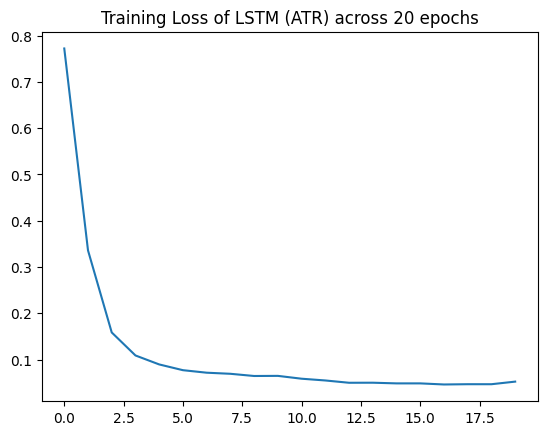

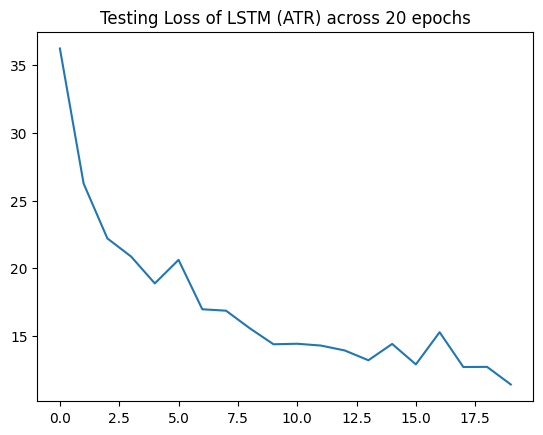

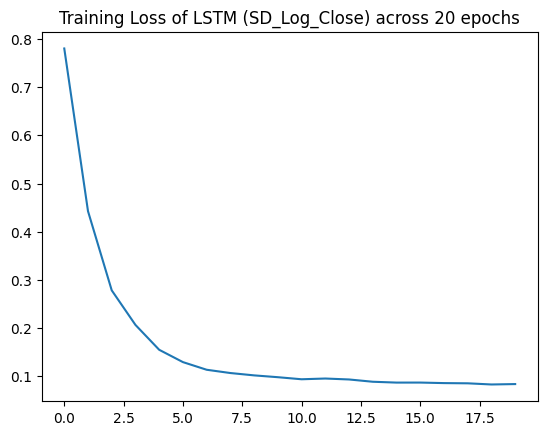

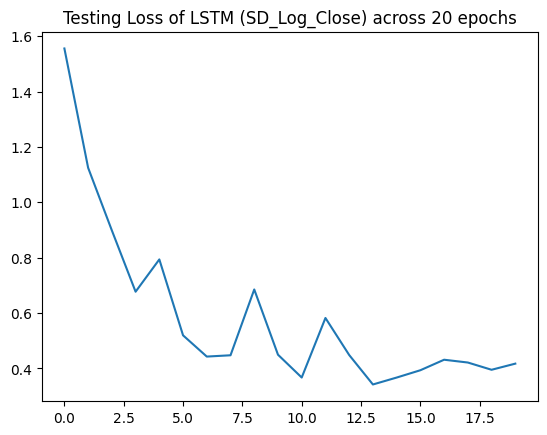

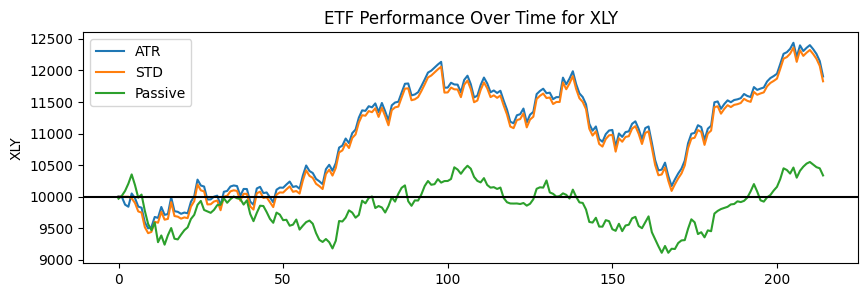

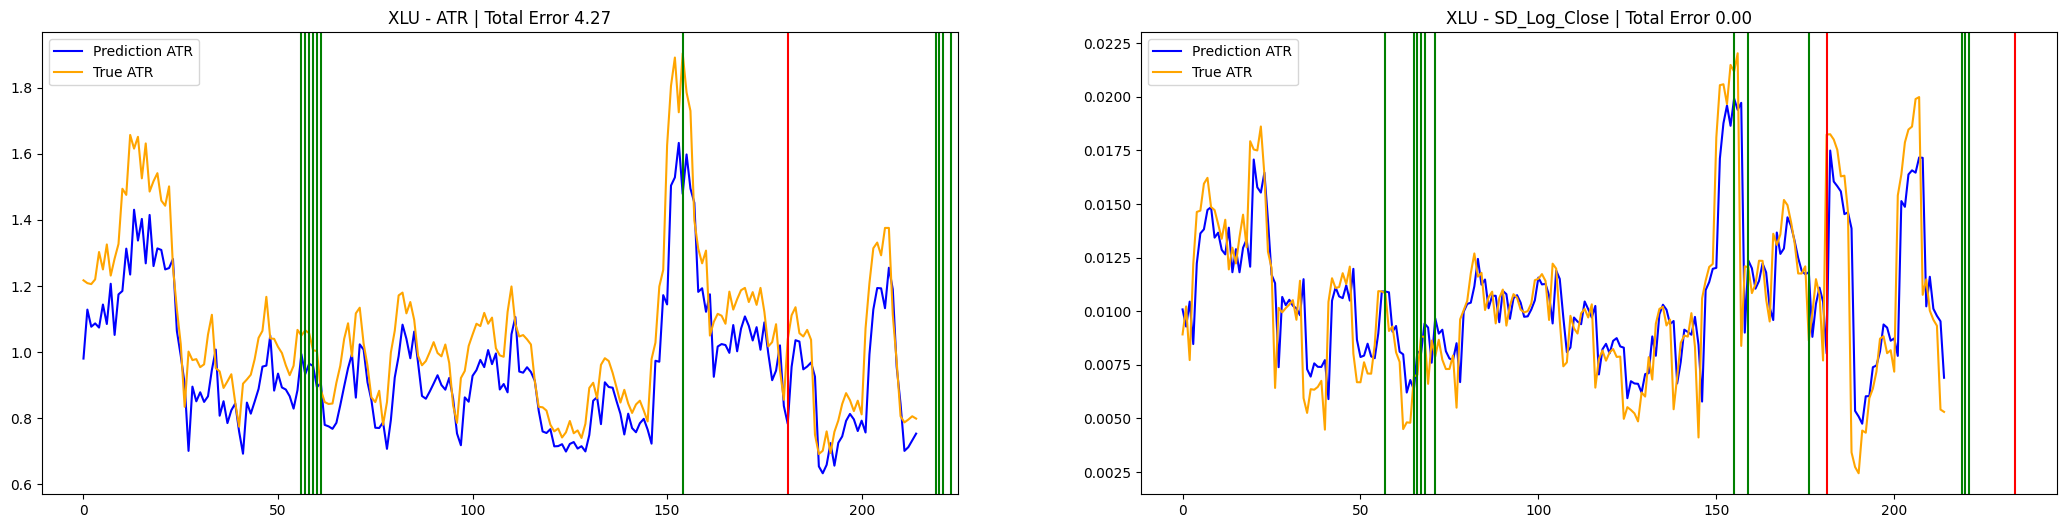

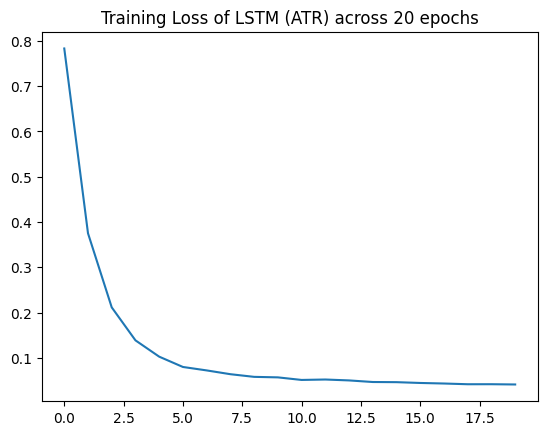

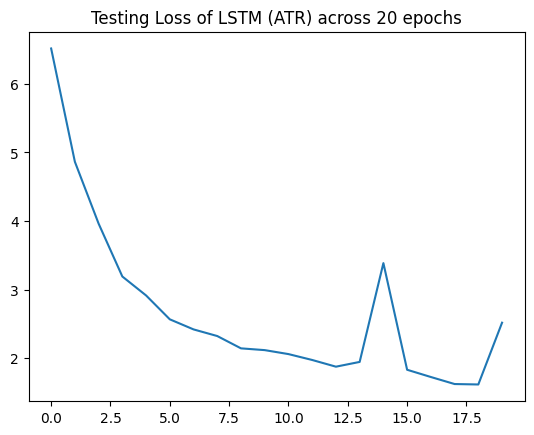

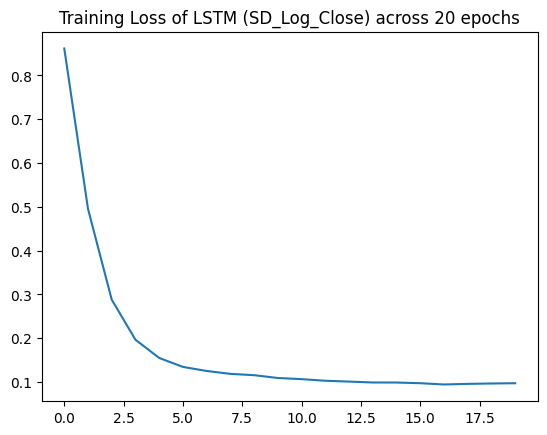

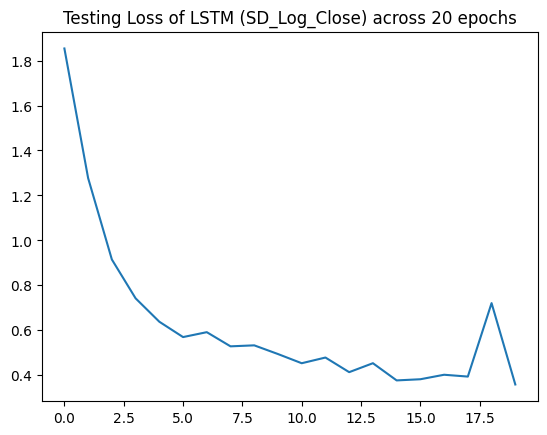

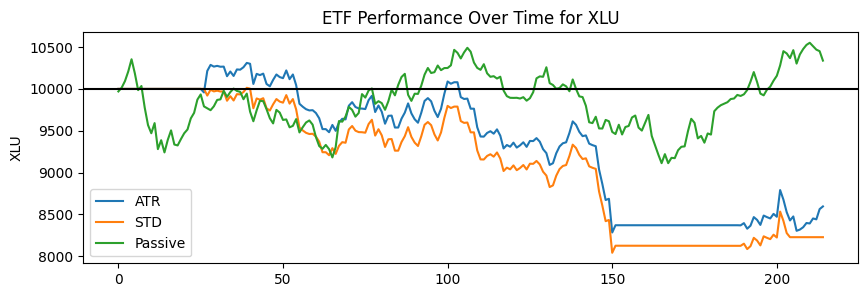

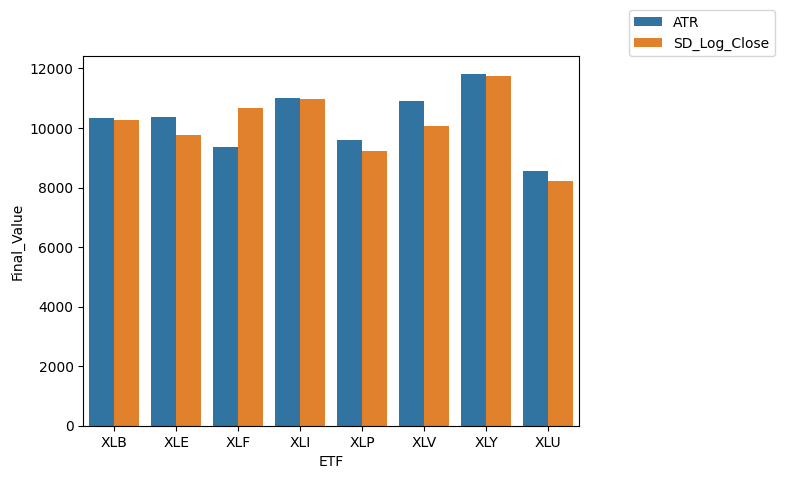

In [5]:
num=1
for file in os.listdir():
    if "runtest" in file:
        num+=1
os.mkdir(f'runtest_{num}')
for etf in etfs:
    os.mkdir(f'runtest_{num}/{etf}')
for lr in lrs:
    results = pd.DataFrame({"ETF":[],"Metric":[],"Final_Value":[],"Passive_Potential":[]})
    money_df_std = pd.DataFrame()
    money_df_atr = pd.DataFrame()
    money_df_passive = pd.DataFrame()
    for j,etf in enumerate(etfs):
        fig,ax = plt.subplots(1,len(metrics),figsize=(26,6))
        for i,metric in enumerate(metrics):
            scaler = StandardScaler()
            df = get_cleaned_df(etf,start,end)
            #print(df)
            model,fig_tr,fig_te = get_trained_model(df,scaler,metric=metric)
            fig_tr.savefig(f'runtest_{num}/{etf}/training_results_{metric}')
            fig_te.savefig(f'runtest_{num}/{etf}/testing_results_{metric}')
            df_test = get_cleaned_df(etf,start_t,end_t)
            print("Number of neg. ATR:",len(df_test.loc[[atr<0 for atr in df_test["ATR"]]]))
            ini_cash = 10000
            final_value, money, shares,passive_value,buy_points,sell_points,preds, t_money,p_money = backtest_strategy(df_test,model,scaler,metric,sell_scale=1.7,buy_scale=1.3)
            print(f"{etf} Final Value: {final_value}, Final Money: {money}, Final Shares: {shares}")
            results.loc[len(results)] = [etf,metric,final_value,passive_value]
            if metric=="ATR":
               money_df_atr[etf] = t_money
            elif metric=="SD_Log_Close":
                money_df_std[etf] = t_money
                money_df_passive[f"{etf}_{metric}_Passive"] = p_money

            real_met = np.array(df_test[metric].iloc[T:len(df_test)-1])
            error = np.sum((real_met-preds)**2)

            sns.lineplot(preds,ax=ax[i],label="Prediction ATR",color="Blue")
            sns.lineplot(real_met,ax=ax[i],label = "True ATR",color="Orange")
            for buy in buy_points:
                ax[i].axvline(buy,color="Green")
            for sell in sell_points:
                ax[i].axvline(sell,color="Red")
            ax[i].set_title(f"{etf} - {metric} | Total Error {error:.2f}")
            #plt.title(f"Performance of LSTM on {etf}")
            fig.savefig(f'runtest_{num}/{etf}/predictions_lr_{lr}.png')
        
        fig_sim,ax_sim = plt.subplots(figsize=(10,3))
        sns.lineplot(x=range(0, 215), y=money_df_atr[etf], label="ATR",ax=ax_sim)
        sns.lineplot(x=range(0,215),y=money_df_std[etf],label="STD",ax=ax_sim)
        sns.lineplot(x=range(0,215),y=money_df_passive[f"XLB_SD_Log_Close_Passive"],label="Passive",ax=ax_sim)
        ax_sim.axhline(10000, label = "Initial",color="Black")
        ax_sim.set_title(f"ETF Performance Over Time for {etf}")
        fig_sim.savefig(f"runtest_{num}/{etf}/simulation_perf_lr_{lr}")
    fig2,ax2 = plt.subplots()
    sns.barplot(data=results,x="ETF",y="Final_Value",hue="Metric",ax=ax2)    
    plt.legend(loc=(1.1,1))
    fig2.savefig(f'runtest_{num}/return_metrics_lr_{lr}.png')

In [15]:
os.listdir()

['get_stock_data.ipynb',
 'predictions_lr_0.05.png',
 'predictions_lr_0.png',
 'sim.ipynb',
 'predictions_lr_0.01.png',
 'read_stock_data_from_file.py',
 'testing.ipynb',
 'predictions_lr_0.125.png',
 '__pycache__',
 'full_sim_tests.ipynb',
 'predictions.png',
 'all_etfs_sim.png',
 'predictions_lr_0.5.png',
 'Clean_Data.csv',
 'utils.py',
 'predictions_lr_0.0.png',
 'TSLA.csv',
 'predictions_lr_0.1.png',
 'SPY.csv',
 'planning.txt',
 'return_metrics.png',
 'predictions_lr_0.25.png',
 'predictions_lr_0.375.png',
 'read_and_save_stock_data.py']

In [10]:
results

,ETF,Metric,Final_Value,Passive_Potential
0,XLB,ATR,10002.12,10304.736262
1,XLE,ATR,9158.60,9974.065779
2,XLF,ATR,9105.51,10444.567936
3,XLI,ATR,9086.14,10963.356974
4,XLP,ATR,10118.27,9878.182316
5,XLV,ATR,9988.73,10776.255708
6,XLY,ATR,12520.07,11846.174995
7,XLU,ATR,8284.71,9604.123095
8,XLB,SD_Log_Close,9258.61,10304.736262
9,XLE,SD_Log_Close,10000.00,9974.065779


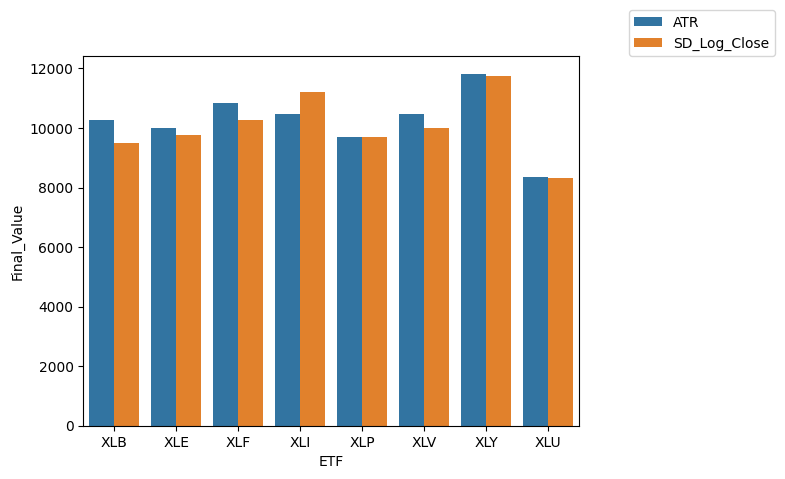

In [6]:
fig2,ax = plt.subplots()
sns.barplot(data=results,x="ETF",y="Final_Value",hue="Metric",ax=ax)
plt.legend(loc=(1.1,1))
fig2.savefig('return_metrics.png')


In [9]:
money_df_passive

,XLB_SD_Log_Close_Passive,XLE_SD_Log_Close_Passive,XLF_SD_Log_Close_Passive,XLI_SD_Log_Close_Passive,XLP_SD_Log_Close_Passive,XLV_SD_Log_Close_Passive,XLY_SD_Log_Close_Passive,XLU_SD_Log_Close_Passive
0,9969.403990,10009.430626,9905.529314,9968.479117,9941.144265,9915.641204,10010.309987,9883.477741
1,10014.686085,9865.613580,9924.979161,9945.823483,9859.019984,9842.117483,10003.436662,9710.188228
2,10093.011871,10060.120240,9891.636566,9985.224586,9786.476868,9825.864871,9877.654822,9550.343591
3,10208.052870,10148.532359,9844.401223,10102.442868,9920.613195,9886.231716,9844.662863,9731.102480
4,10353.689879,10286.455263,10000.000000,10211.780930,9928.825623,9996.904264,10056.361262,9896.922617
...,...,...,...,...,...,...,...,...
210,10550.728185,10058.941412,10450.125035,11239.164697,9834.382699,10516.987849,12431.094921,9405.437705
211,10510.341451,9905.693740,10480.689080,11242.119779,9838.488913,10544.075536,12366.485669,9472.662085
212,10468.730877,9883.296004,10447.346485,11228.329393,9859.019984,10554.910611,12290.191766,9460.711085
213,10450.373271,9989.390546,10491.803279,11115.051221,9969.887763,10740.654748,12176.094577,9598.147595


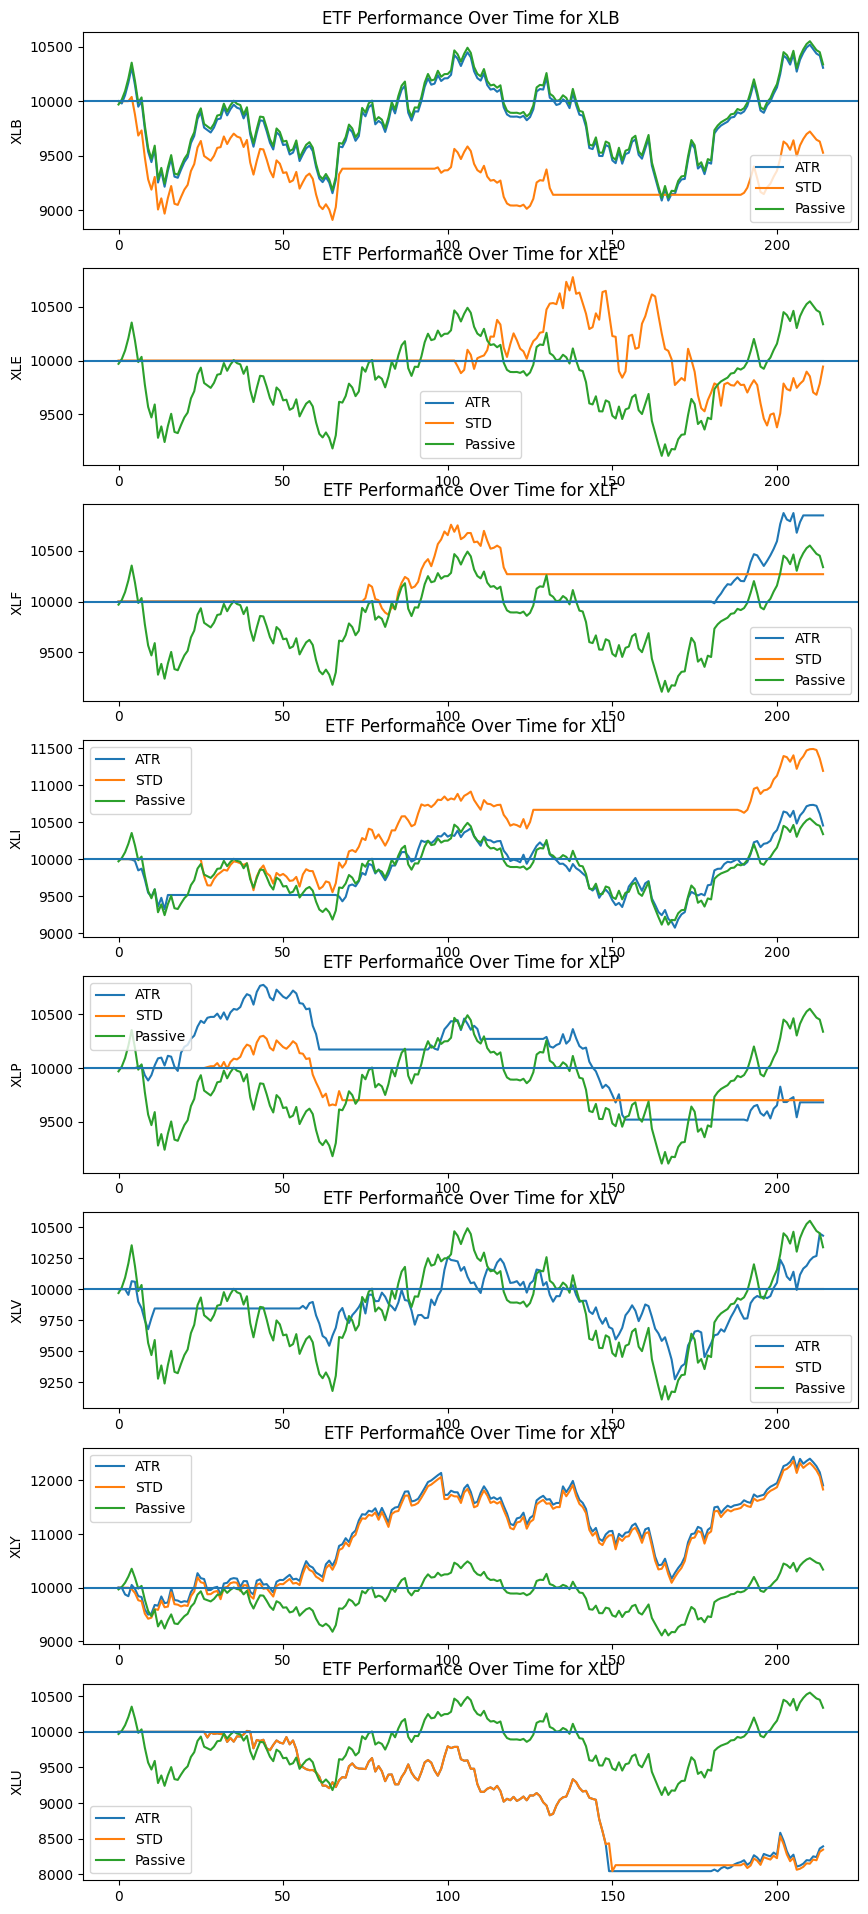

In [14]:
fig3,ax = plt.subplots(len(etfs),1,figsize=(10,24))


for i,etf in enumerate(money_df_atr.columns):
    sns.lineplot(x=range(0, 215), y=money_df_atr[etf], label="ATR", ax=ax[i])
    sns.lineplot(x=range(0,215),y=money_df_std[etf],label="STD",ax=ax[i])
    sns.lineplot(x=range(0,215),y=money_df_passive[f"XLB_SD_Log_Close_Passive"],label="Passive",ax=ax[i])
    ax[i].axhline(10000)
    ax[i].set_title(f"ETF Performance Over Time for {etf}")
plt.legend()  
plt.show()
      




In [10]:
money_df = pd.DataFrame()

money_df['xlb'] = [5,6,7]